# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [2]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [4]:
def max_after_zero(x):
    zero_positions = np.where(x[:-1] == 0)[0] + 1
    if zero_positions.size == 0:
        return None
    return np.max(x[zero_positions])
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max_after_zero(x))

5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [9]:
def nearest_value(X, v):
    return X.ravel()[np.abs(X - v).ravel().argmin()]

X = np.arange(0, 10).reshape((2, 5))
v = 3.6
print(nearest_value(X,v))



4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [ ]:
def scale(X):
    mid = np.mean(X, axis = 0)
    diff = X - mid
    mid_ch = (np.var(X, axis =0))**0.5
    mid_ch_safe = np.where(mid_ch == 0, 1, mid_ch)
    return diff/mid_ch_safe
X = np.random.randint(1,10 ,size = (4,4))

print(scale(X))


[[ 0.39056673  1.56892908  1.         -1.09544512]
 [-0.65094455 -0.39223227  1.          0.36514837]
 [ 1.43207802  0.         -1.          1.46059349]
 [-1.1717002  -1.17669681 -1.         -0.73029674]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [ ]:
def get_stats(X):
    X = np.asarray(X, dtype=float)

    det = np.linalg.det(X)
    trace = np.trace(X)
    min_elem = np.min(X)
    max_elem = np.max(X)
    frob_norm = np.linalg.norm(X, 'fro')
    eigenvalues = np.linalg.eigvals(X)

    if abs(det) < 1e-10:
        inv = None
    else:
        inv = np.linalg.inv(X)

    return {
        "Определитель": det,
        "След": trace,
        "Мин элемент": min_elem,
        "Макс элемент": max_elem,
        "Норма Фробениуса": frob_norm,
        "Собственные числа": eigenvalues,
        "Обратная матрица": inv
    }

np.random.seed(0)
X = np.random.normal(loc=10, scale=1, size=(3, 3))

print("Матрица X (N(10,1)):\n", X, "\n")

result = get_stats(X)

for key, value in result.items():
    print(f"{key}:")
    print(value, "\n")

Матрица X (N(10,1)):
 [[11.76405235 10.40015721 10.97873798]
 [12.2408932  11.86755799  9.02272212]
 [10.95008842  9.84864279  9.89678115]] 

Определитель:
0.7818319812364621 

След:
33.528391484324075 

Мин элемент:
9.02272212012359 

Макс элемент:
12.240893199201459 

Норма Фробениуса:
32.46572464904387 

Собственные числа:
[3.23834750e+01 2.14904498e-02 1.12342601e+00] 

Обратная матрица:
[[ 36.5667531    6.6479615  -46.62521112]
 [-28.58137887  -4.85001924  36.12769045]
 [-12.01616837  -2.52907069  15.73657777]] 



**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [10]:
maxima = []
for exp_num in range(100):
    maxima = []
    A = np.random.randn(10, 10)
    B = np.random.randn(10, 10)
    C = A.dot(B)
    maxima.append(np.max(C))

maxima = np.array(maxima)
mean_val = maxima.mean()
q95 = np.quantile(maxima, 0.95)
print(maxima, q95)

[7.06460121] 7.064601214668952


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [11]:
import pandas as pd
%matplotlib inline

In [13]:
df = pd.read_csv("2008.csv")
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57192,2008,11,22,6,1854.0,1820,1957.0,1925,WN,1963,...,3.0,15.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,31.0
57193,2008,3,10,1,1357.0,1342,1513.0,1459,OO,5974,...,8.0,11.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
57194,2008,1,31,4,1017.0,1017,1209.0,1213,OO,6371,...,3.0,31.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
57195,2008,1,6,7,1911.0,1850,2036.0,2019,XE,2551,...,6.0,13.0,0.0,NaN,0.0,0.0,0.0,0.0,17.0,0.0


**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [ ]:
df.groupby('CancellationCode').agg({"CancellationCode": "count"}).head(1)

,CancellationCode
CancellationCode,
A,175


код A соответсвует carrier

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [14]:
df.groupby('TailNum').agg(минимальное = ('Distance', 'min')).head(5)

,минимальное
TailNum,
80009E,223.0
80019E,155.0
80059E,98.0
80129E,120.0
80139E,189.0


In [ ]:
df.groupby('TailNum').agg(максимальное =('Distance', 'max')).head(5)

,максимальное
TailNum,
80009E,897.0
80019E,777.0
80059E,576.0
80129E,536.0
80139E,398.0


In [ ]:
df.groupby('TailNum').agg(среднее=('Distance', 'mean')).head(5)

,среднее
TailNum,
80009E,462.714286
80019E,446.571429
80059E,413.750000
80129E,390.500000
80139E,338.000000


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [15]:
m = df.loc[(df['TailNum'] =='80019E') & (df['Distance'] == 288.0), ['Year', 'Month', 'DayofMonth', 'FlightNum']]
flights = pd.array(m['FlightNum'])
m

,Year,Month,DayofMonth,FlightNum
8278,2008,5,21,2975


In [16]:
df.loc[(df['FlightNum'].isin(flights)) & ~((df['Year'] == 2008) & (df['Month'] == 3) & (df['DayofMonth'] == 2)), ['FlightNum', 'Distance'] ]

,FlightNum,Distance
579,2975,217.0
4159,2975,470.0
8278,2975,288.0
15132,2975,217.0
15157,2975,470.0
32300,2975,470.0


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [19]:
m = df.loc[df['Cancelled'] == 0]
m.groupby('Origin').agg({'DepTime': 'count'}).sort_values(by='DepTime', ascending=False).head(1)


,DepTime
Origin,
ATL,3347


город Atlanta

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [20]:
m = df.loc[df['DepTime'].notna(), ['Origin', 'DepTime', 'AirTime']]
m.groupby('Origin')['AirTime'].mean().sort_values( ascending=False)

,AirTime
Origin,
SJU,206.491329
PSE,195.714286
BQN,194.214286
STT,182.666667
ANC,164.600000
...,...
MCN,23.750000
OXR,19.384615
WRG,18.000000


SJU


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [21]:
m = df.loc[df['DepDelay']>0]

m.groupby('Origin').filter(lambda x: x['DepTime'].count() > 1000).groupby('Origin')['DepDelay'].count().sort_values( ascending=False).head(1)

,DepDelay
Origin,
ATL,1417


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               70000 non-null  int64  
 1   Month              70000 non-null  int64  
 2   DayofMonth         70000 non-null  int64  
 3   DayOfWeek          70000 non-null  int64  
 4   DepTime            68601 non-null  float64
 5   CRSDepTime         70000 non-null  int64  
 6   ArrTime            68444 non-null  float64
 7   CRSArrTime         70000 non-null  int64  
 8   UniqueCarrier      70000 non-null  object 
 9   FlightNum          70000 non-null  int64  
 10  TailNum            69180 non-null  object 
 11  ActualElapsedTime  68418 non-null  float64
 12  CRSElapsedTime     69991 non-null  float64
 13  AirTime            68418 non-null  float64
 14  ArrDelay           68418 non-null  float64
 15  DepDelay           68601 non-null  float64
 16  Origin             700

In [45]:
total_na = df.isna().sum().sum()
rows_with_na = df.isna().any(axis=1).sum()
cols_with_na = df.isna().any(axis=0).sum()

print(f"Всего пропущенных элементов: {total_na}")
print(f"Количество объектов с хотя бы одним пропуском: {rows_with_na}")
print(f"Количество признаков с хотя бы одним пропуском: {cols_with_na}")

Всего пропущенных элементов: 355215
Количество объектов с хотя бы одним пропуском: 70000
Количество признаков с хотя бы одним пропуском: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [22]:
print(df['DepDelay'].isna().any())
m = df.loc[df['DepDelay'].isna()]
print(m.loc[(df['Cancelled'] != 1) & (df['Cancelled'].notna())].any().any())
print(m.loc[df['Cancelled'].isna()].any().sum())

df = df[(df['DepDelay'].notna()) & (df['DepDelay'] !=0)]

df.drop(columns=['Cancelled', 'CancellationCode'], inplace=True)
Y = df['DepDelay']
X = df.drop(columns='DepDelay')

True
False
0


/tmp/ipython-input-2785731231.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Cancelled', 'CancellationCode'], inplace=True)


имеются, обьединяет что у всех из них cancelled = 1 либо в целом полностью пустая строка, соответсвенно cancelled и CancellationCode можно удалить из фич, потому что в остальных случая это значение равно 0

In [83]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 63404 entries, 0 to 69999
Series name: DepDelay
Non-Null Count  Dtype  
--------------  -----  
63404 non-null  float64
dtypes: float64(1)
memory usage: 990.7 KB


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [84]:
X

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,CLE,307,3.0,8.0,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,AVL,834,4.0,12.0,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,TPA,997,4.0,9.0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,FCA,532,4.0,19.0,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,AUS,1090,4.0,8.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,BDL,661,12.0,13.0,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,ATL,606,22.0,20.0,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,GRR,137,4.0,13.0,0,0.0,0.0,0.0,0.0,22.0
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,MSP,1416,20.0,22.0,0,0.0,0.0,15.0,0.0,6.0


In [6]:
def time_h(item):
  return item // 60
def time_m(item):
  return item % 60
X['DepTime_Hour'] =  X['DepTime'].apply(time_h)
X['DepTime_Minute'] =  X['DepTime'].apply(time_m)

X['CRSDepTime_Hour'] =  X['CRSDepTime'].apply(time_h)
X['CRSDepTime_Minute'] =  X['CRSDepTime'].apply(time_m)

X['ArrTime_Hour'] =  X['ArrTime'].apply(time_h)
X['ArrTime_Minute'] =  X['ArrTime'].apply(time_m)

X['CRSArrTime_Hour'] =  X['CRSArrTime'].apply(time_h)
X['CRSArrTime_Minute'] =  X['CRSArrTime'].apply(time_m)

X.drop(columns=['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], inplace=True)

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [32]:
cols_to_drop = [
    'TailNum', 'Year',
    'ArrDelay',
    'LateAircraftDelay',
    'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'ActualElapsedTime'
]
# cols_to_drop = #['TaxiIn', 'TaxiOut'] ,
X.drop(columns=cols_to_drop, inplace=True)

все признаки с суффиксом delay напрямую связаны с переменной , синонимичны ей и содержат данные переменной


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51788 entries, 0 to 57196
Columns: 628 entries, Month to Dest_nan
dtypes: bool(614), float64(14)
memory usage: 36.3 MB


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

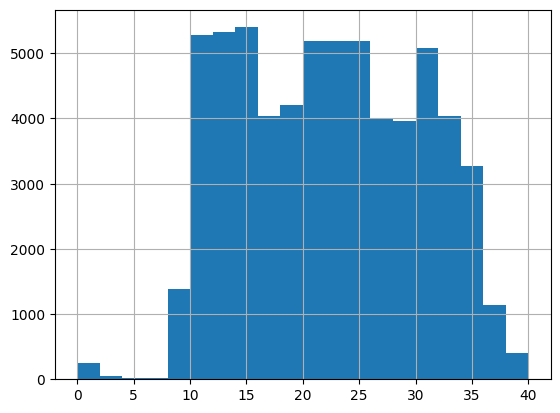

In [53]:
X['DepTime_Hour'].hist(bins=20)

<Axes: >

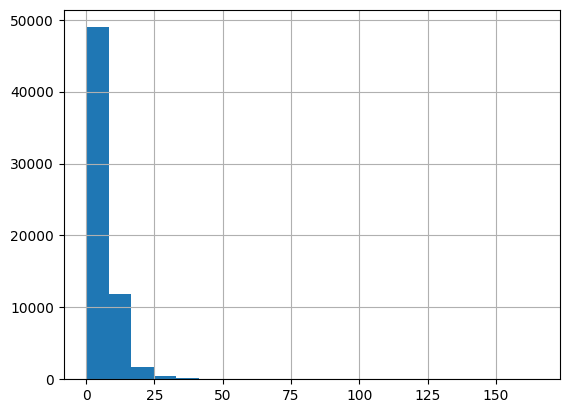

In [54]:
X['TaxiIn'].hist(bins=20)

<Axes: >

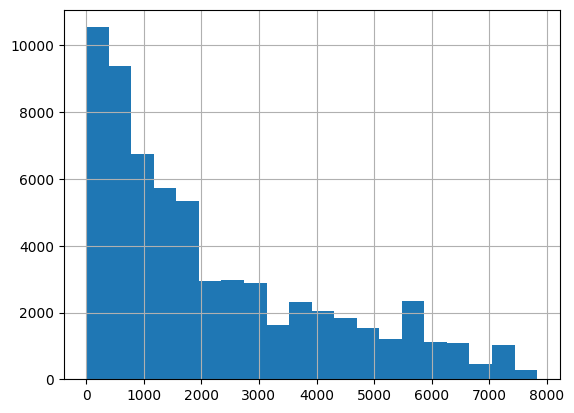

In [55]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

очевидное смещение графика относительно медианы, т.е. высока дисперсия, плюс соответсвенно большой разрыв между наименьшим и наибольшим значением. масштабирование отнормирует данные

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [34]:
from sklearn.preprocessing import StandardScaler
def transform_data(data):
    cat_cols = data.select_dtypes(include=['object']).columns
    num_cols = data.select_dtypes(include=[np.number]).columns

    df_num = data[num_cols].fillna(0)
    df_cat = data[cat_cols].fillna('nan')

    scaler = StandardScaler()
    df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=num_cols, index=df.index)


    df_cat_encoded = pd.get_dummies(df_cat, drop_first=False)


    df_transformed = pd.concat([df_num_scaled, df_cat_encoded], axis=1)

    return df_transformed



Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [35]:
X =transform_data(X)

ValueError: No objects to concatenate

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51788 entries, 0 to 57196
Columns: 628 entries, Month to Dest_nan
dtypes: bool(614), float64(14)
memory usage: 36.3 MB


629 признаков

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)).

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
X_sub = X_train[:1000]
y_sub = y_train[:1000]

model = LinearRegression()
model.fit(X_sub, y_sub)

y_sub_pred = model.predict(X_sub)


y_test_pred = model.predict(X_test)


mse_train = mean_squared_error(y_sub, y_sub_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_sub, y_sub_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MSE train:", mse_train)
print("R2 train:", r2_train)
print("MSE test:", mse_test)
print("R2 test:", r2_test)

coeffs = pd.Series(model.coef_, index=X_train.columns)
print(coeffs.sort_values(key=abs, ascending=False).head(10))

MSE train: 861.8404373144447
R2 train: 0.3625754814010851
MSE test: 1495.9994858982936
R2 test: -0.21138864936438284
Dest_TVC      90.307612
Dest_GTF      83.195103
Dest_LFT      83.012168
Dest_EUG      82.787534
Dest_HPN      77.192418
Origin_IND    70.490169
Origin_EVV    69.139490
Dest_DSM      58.118184
Dest_SMX     -55.760022
Origin_GSO    45.920650
dtype: float64


Недостаточная обучающая выборка

линейная регрессия не видит закономерностей.

Высокая разреженность данных



Переобучение


На тесте качество резко падает (R² < 0).

Выбросы и шум в целевой переменной



Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [40]:
from sklearn.linear_model import Ridge, Lasso


In [41]:
import matplotlib.pyplot as plt


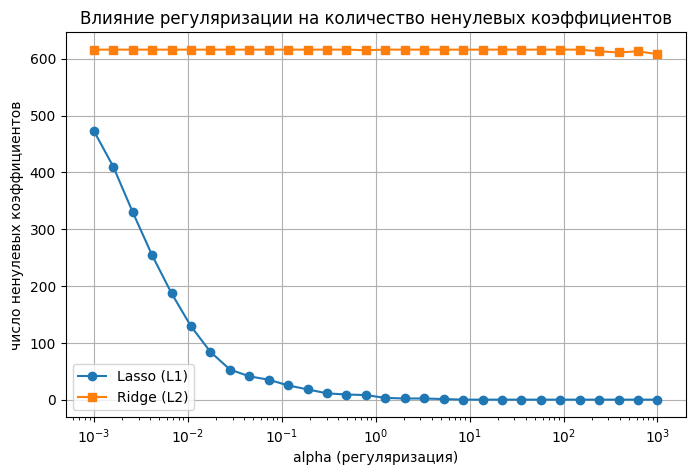

In [42]:
alphas = np.logspace(-3, 3, 30)

lasso_nonzero = []
ridge_nonzero = []

for alpha in alphas:

    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_nonzero.append(np.sum(np.abs(lasso.coef_) > 1e-3))


    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_nonzero.append(np.sum(np.abs(ridge.coef_) > 1e-3))


plt.figure(figsize=(8, 5))
plt.plot(alphas, lasso_nonzero, label="Lasso (L1)", marker='o')
plt.plot(alphas, ridge_nonzero, label="Ridge (L2)", marker='s')
plt.xscale('log')
plt.xlabel("alpha (регуляризация)")
plt.ylabel("число ненулевых коэффициентов")
plt.title("Влияние регуляризации на количество ненулевых коэффициентов")
plt.legend()
plt.grid(True)
plt.show()

Для Ridge-регрессии количество ненулевых коэффициентов практически не меняется с ростом α (график на уровне ~600), что соответствует её свойству не обнулять коэффициенты, а лишь сжимать их. Для Lasso при α ≈ 10 и выше большинство коэффициентов стремятся к нулю, что показывает разреживающий эффект L1-регуляризации и способность к отбору признаков. Результаты полностью согласуются с теорией.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [44]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


ridge = Ridge(alpha=0.001, random_state=42)
ridge.fit(X_train, y_train)


y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {rmse_train:.3f}, MAE: {mae_train:.3f}, R²: {r2_train:.3f}")
print(f"Test RMSE: {rmse_test:.3f}, MAE: {mae_test:.3f}, R²: {r2_test:.3f}")


Train RMSE: 34.160, MAE: 17.523, R²: 0.143
Test RMSE: 33.495, MAE: 17.693, R²: 0.092


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [46]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [47]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ridge = Ridge()

param_grid = {'alpha': alphas}

grid = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=kf,
    n_jobs=-1
)

In [48]:
grid.fit(X_train[:1000], y_train[:1000])  # первые 1000 объектов


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 1.61026203e-03, 2.59294380e-03, 4.17531894e-03,
       6.72335754e-03, 1.08263673e-02, 1.74332882e-02, 2.80721620e-02,
       4.52035366e-02, 7.27895384e-02, 1.17210230e-01, 1.88739182e-01,
       3.03919538e-01, 4.89390092e-01, 7.88046282e-01, 1.26896100e+00,
       2.04335972e+00, 3.29034456e+00, 5.29831691e+00, 8.53167852e+00,
       1.37382380e+01, 2.21221629e+01, 3.56224789e+01, 5.73615251e+01,
       9.23670857e+01, 1.48735211e+02, 2.39502662e+02, 3.85662042e+02,
       6.21016942e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

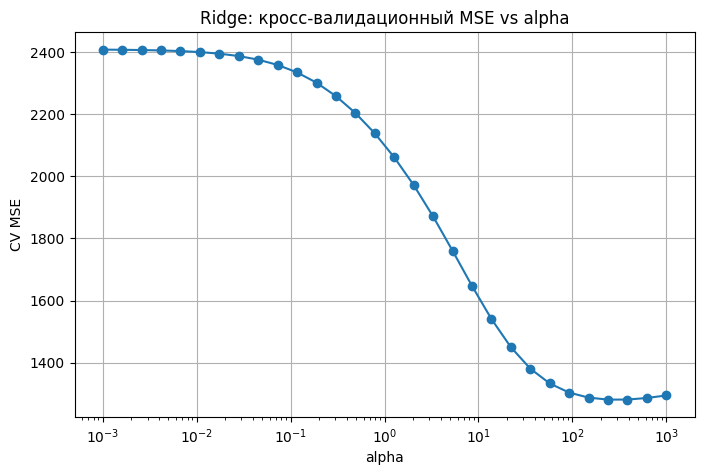

In [49]:
mse_mean = -grid.cv_results_['mean_test_score']  # GridSearchCV возвращает отрицательный MSE

plt.figure(figsize=(8,5))
plt.plot(alphas, mse_mean, marker='o')
plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel("CV MSE")
plt.title("Ridge: кросс-валидационный MSE vs alpha")
plt.grid(True)
plt.show()


In [50]:
best_ridge = grid.best_estimator_

y_pred_train = best_ridge.predict(X_train[:1000])
y_pred_test = best_ridge.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train[:1000], y_pred_train))
mae_train = mean_absolute_error(y_train[:1000], y_pred_train)
r2_train = r2_score(y_train[:1000], y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Best alpha: {grid.best_params_['alpha']}")
print(f"Train RMSE: {rmse_train:.3f}, MAE: {mae_train:.3f}, R²: {r2_train:.3f}")
print(f"Test RMSE: {rmse_test:.3f}, MAE: {mae_test:.3f}, R²: {r2_test:.3f}")


Best alpha: 239.5026619987486
Train RMSE: 34.583, MAE: 18.585, R²: 0.115
Test RMSE: 34.306, MAE: 18.757, R²: 0.047


После подбора оптимального коэффициента регуляризации α через кросс-валидацию качество модели не сильно изменилось.

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [55]:
from sklearn.model_selection import cross_val_predict



ridge = Ridge(alpha=grid.best_params_['alpha'])


y_pred_oof = cross_val_predict(ridge, X_train[:1000], y_train[:1000], cv=5)


errors = y_train[:1000] - y_pred_oof


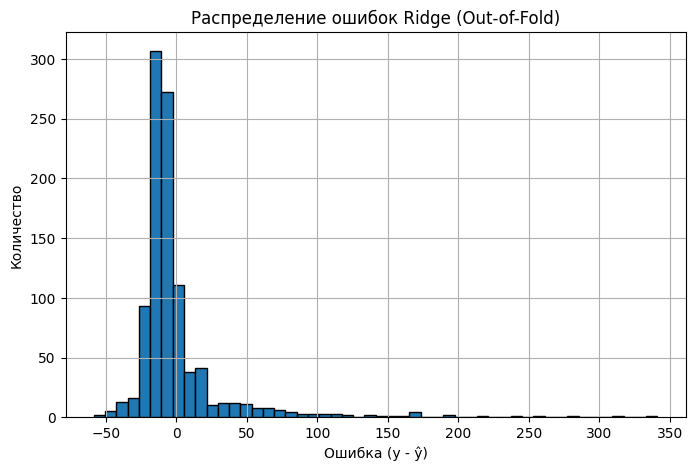

In [56]:
plt.figure(figsize=(8,5))
plt.hist(errors, bins=50, edgecolor='black')
plt.xlabel("Ошибка (y - ŷ)")
plt.ylabel("Количество")
plt.title("Распределение ошибок Ridge (Out-of-Fold)")
plt.grid(True)
plt.show()


Гистограмма ошибок показывает, что большинство предсказаний сосредоточено около нуля, т.е. модель правильно предсказывает DepDelay для большинства рейсов. Хвосты распределения указывают на наличие выбросов, где модель сильно ошибается. Это объясняет чувствительность MSE к редким большим ошибкам.